# ResNet(CVPR 2016), DenseNet 101
## ResNet
Deep Residual Learning for Image Recognition
He, Kaiming, et al. "Deep residual learning for image recognition." Proceedings of the IEEE conference on computer vision and pattern recognition. 2016.
https://www.cv-foundation.org/openaccess/content_cvpr_2016/papers/He_Deep_Residual_Learning_CVPR_2016_paper.pdf
## DenseNet
Densely connected convolutional networks.
Huang, Gao, et al. "Densely connected convolutional networks." Proceedings of the IEEE conference on computer vision and pattern recognition. 2017.
http://openaccess.thecvf.com/content_cvpr_2017/papers/Huang_Densely_Connected_Convolutional_CVPR_2017_paper.pdf

### Import 

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from keras.models import Model
from keras.callbacks import *
from keras.layers import Input, Dense, Flatten,Activation, BatchNormalization, Conv2D, Conv2DTranspose, MaxPooling2D, Add, AveragePooling2D
from keras.activations import *
from keras.datasets import cifar,cifar10,cifar100
from keras.utils import to_categorical, plot_model
from keras.optimizers import *

Using TensorFlow backend.


In [3]:
(x_train, y_train), (x_test, y_test) = cifar100.load_data()

In [4]:
y_train = to_categorical(y_train, num_classes=100)
y_test  = to_categorical(y_test, num_classes=100)

In [5]:
x_train.shape

(50000, 32, 32, 3)

In [6]:
y_train.shape

(50000, 100)

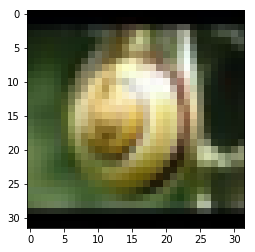

In [7]:
plt.imshow(x_train[87])

## ResNet

### What is Residual?
Just a error of funtion output. o'_'o   
For pretty simple PR reason, we cannot call our net is ErrorNet.   
>**It was not OK.**   

#### Definition 
If we have a function $f(x) =b$  
Given an apporxination $x_0\in X$, the *residual* of $f(x)$ is $$b-f(x_0)$$

#### Residaul V. Error
Error $$x-x_0$$
Residual $$f(x)-f(x_0)$$

#### How to use it in NN?
It's pretty simple. 
> **Layer is a fucntion** (Roughly)


Given we have two mapping of two layers $f,g$, identity function $i$, $H$ is desired mapping of whole block, $F$ is desired mapping of $g\circ f$. $X$ is a vector space.
$$X \overset{f}{\longrightarrow} X \overset{g}{\longrightarrow} X $$
$$x \longmapsto f(x)  \longmapsto g\circ f(x) $$
$$i: X\longrightarrow X$$
$$  x \longmapsto x $$
$$H,F: X\longrightarrow X$$
we hope $ g\circ f$ can be apporched $F$.  
  
Let $$ H(x) = F(x)+x$$
so $$F(x) = H(x)-x$$
Given $x_0$ is the apporch value we have.  
And the residual of $H$ is $$H(x)-H(x_0)$$  
Since
$$H(x)= F(x)+x$$
$$H(x_0)= F(x_0)+x_0$$
we can know that
$$ H(x)-H(x_0) = F(x)-F(x_0)+x-x_0$$
  
Also. If we consider $\hat{H}, \hat{F}$ is the mapping we have now.
Since
$$H(x)= F(x)+x$$
$$\hat{H}(x)=\hat{F}(x)+x$$
so we can get
$$H(x)-\hat{H}(x) = F(x)-\hat{F}(x)$$



#### Resdual Block

In [8]:
res_block_input = Input((9,4,87))
res_block_1     = BatchNormalization()(res_block_input)
res_block_1     = Activation('relu')(res_block_1)
res_block_1     = Conv2D(87, 3 , strides=1, padding='same')(res_block_1)
res_block_2     = BatchNormalization()(res_block_1)
res_block_2     = Activation('relu')(res_block_2)
res_block_2     = Conv2D(87, 3 , strides=1, padding='same')(res_block_2)
res_block_add   = Add()([res_block_input, res_block_2])

res_block = Model(res_block_input, res_block_add, name='res_block')
plot_model(res_block, 'resnres_block.png', show_layer_names=False)
res_block.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_1 (InputLayer)             (None, 9, 4, 87)      0                                            
____________________________________________________________________________________________________
batch_normalization_1 (BatchNorm (None, 9, 4, 87)      348         input_1[0][0]                    
____________________________________________________________________________________________________
activation_1 (Activation)        (None, 9, 4, 87)      0           batch_normalization_1[0][0]      
____________________________________________________________________________________________________
conv2d_1 (Conv2D)                (None, 9, 4, 87)      68208       activation_1[0][0]               
___________________________________________________________________________________________

### Original version ResNet(ReLu+Batch Normalization)

#### With Resdual Block

In [9]:
cl_in      = Input(shape=x_train.shape[1:])
cl_conv_1  = Conv2D(64, 3, strides=2, activation='selu', padding='same', kernel_initializer='lecun_normal')(cl_in)
cl_pl_1    = MaxPooling2D()(cl_conv_1)
cl_res_1_1 = BatchNormalization()(cl_pl_1)
cl_res_1_1 = Activation('relu')(cl_res_1_1)
cl_res_1_1 = Conv2D(64, 3, strides=1, padding='same', kernel_initializer='lecun_normal')(cl_res_1_1)
cl_res_1_2 = BatchNormalization()(cl_res_1_1)
cl_res_1_2 = Activation('relu')(cl_res_1_2)
cl_res_1_2 = Conv2D(64, 3, strides=1, padding='same', kernel_initializer='lecun_normal')(cl_res_1_2)
cl_res_1_a = Add()([cl_pl_1, cl_res_1_2])
cl_res_2_1 = BatchNormalization()(cl_res_1_a)
cl_res_2_1 = Activation('relu')(cl_res_2_1)
cl_res_2_1 = Conv2D(64, 3, strides=1, padding='same', kernel_initializer='lecun_normal')(cl_res_2_1)
cl_res_2_2 = BatchNormalization()(cl_res_2_1)
cl_res_2_2 = Activation('relu')(cl_res_2_2)
cl_res_2_2 = Conv2D(64, 3, strides=1, padding='same', kernel_initializer='lecun_normal')(cl_res_2_2)
cl_res_2_a = Add()([cl_res_1_a, cl_res_2_2])
cl_res_3_1 = BatchNormalization()(cl_res_2_a)
cl_res_3_1 = Activation('relu')(cl_res_3_1)
cl_res_3_1 = Conv2D(64, 3, strides=1, padding='same', kernel_initializer='lecun_normal')(cl_res_3_1)
cl_res_3_2 = BatchNormalization()(cl_res_3_1)
cl_res_3_2 = Activation('relu')(cl_res_3_2)
cl_res_3_2 = Conv2D(64, 3, strides=1, padding='same', kernel_initializer='lecun_normal')(cl_res_3_2)
cl_res_3_a = Add()([cl_res_2_a, cl_res_3_2])
cl_conv_2  = Conv2D(128, 3, strides=2, padding='same', kernel_initializer='lecun_normal')(cl_res_3_a)
cl_conv_2  = Conv2D(128, 3, strides=1, padding='same', kernel_initializer='lecun_normal')(cl_conv_2)
cl_res_4_1 = BatchNormalization()(cl_conv_2)
cl_res_4_1 = Activation('relu')(cl_res_4_1)
cl_res_4_1 = Conv2D(128, 3, strides=1, padding='same', kernel_initializer='lecun_normal')(cl_res_4_1)
cl_res_4_2 = BatchNormalization()(cl_res_4_1)
cl_res_4_2 = Activation('relu')(cl_res_4_2)
cl_res_4_2 = Conv2D(128, 3, strides=1, padding='same', kernel_initializer='lecun_normal')(cl_res_4_2)
cl_res_4_a = Add()([cl_conv_2, cl_res_4_2])
cl_res_5_1 = BatchNormalization()(cl_res_4_a)
cl_res_5_1 = Activation('relu')(cl_res_5_1)
cl_res_5_1 = Conv2D(128, 3, strides=1, padding='same', kernel_initializer='lecun_normal')(cl_res_5_1)
cl_res_5_2 = BatchNormalization()(cl_res_5_1)
cl_res_5_2 = Activation('relu')(cl_res_5_2)
cl_res_5_2 = Conv2D(128, 3, strides=1, padding='same', kernel_initializer='lecun_normal')(cl_res_5_2)
cl_res_5_a = Add()([cl_res_4_a, cl_res_5_2])
cl_res_6_1 = BatchNormalization()(cl_res_5_a)
cl_res_6_1 = Activation('relu')(cl_res_6_1)
cl_res_6_1 = Conv2D(128, 3, strides=1, padding='same', kernel_initializer='lecun_normal')(cl_res_6_1)
cl_res_6_2 = BatchNormalization()(cl_res_6_1)
cl_res_6_2 = Activation('relu')(cl_res_6_2)
cl_res_6_2 = Conv2D(128, 3, strides=1, padding='same', kernel_initializer='lecun_normal')(cl_res_6_2)
cl_res_6_a = Add()([cl_res_5_a, cl_res_6_2])
cl_pl_2    = AveragePooling2D()(cl_res_6_a)
cl_flatten = Flatten()(cl_pl_2)
cl_fc100   = Dense(100, activation='softmax')(cl_flatten)
classifier_ReLUBN = Model(cl_in, cl_fc100)
plot_model(classifier_ReLUBN, 'resnet_ReLUBN.png', show_layer_names=False)
classifier_ReLUBN.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_2 (InputLayer)             (None, 32, 32, 3)     0                                            
____________________________________________________________________________________________________
conv2d_3 (Conv2D)                (None, 16, 16, 64)    1792        input_2[0][0]                    
____________________________________________________________________________________________________
max_pooling2d_1 (MaxPooling2D)   (None, 8, 8, 64)      0           conv2d_3[0][0]                   
____________________________________________________________________________________________________
batch_normalization_3 (BatchNorm (None, 8, 8, 64)      256         max_pooling2d_1[0][0]            
___________________________________________________________________________________________

In [10]:
OPT = Adam(0.00001)
classifier_ReLUBN.compile(loss='binary_crossentropy', optimizer=OPT, metrics=['binary_crossentropy', 'mse','acc'])
hist_classifier_ReLUBN_Res = classifier_ReLUBN.fit(x_train,y_train, batch_size=64, epochs=100, validation_data=(x_test, y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 11s - loss: 0.2089 - binary_crossentropy: 0.2089 - mean_squared_error: 0.0182 - acc: 0.9806 - val_loss: 0.1989 - val_binary_crossentropy: 0.1989 - val_mean_squared_error: 0.0178 - val_acc: 0.9807
Epoch 2/100
50000/50000 [==============================] - 10s - loss: 0.1929 - binary_crossentropy: 0.1929 - mean_squared_error: 0.0175 - acc: 0.9809 - val_loss: 0.1879 - val_binary_crossentropy: 0.1879 - val_mean_squared_error: 0.0173 - val_acc: 0.9810
Epoch 3/100
50000/50000 [==============================] - 10s - loss: 0.1852 - binary_crossentropy: 0.1852 - mean_squared_error: 0.0171 - acc: 0.9812 - val_loss: 0.1809 - val_binary_crossentropy: 0.1809 - val_mean_squared_error: 0.0168 - val_acc: 0.9815
Epoch 4/100
50000/50000 [==============================] - 10s - loss: 0.1805 - binary_crossentropy: 0.1805 - mean_squared_error: 0.0168 - acc: 0.9814 - val_loss: 0.1786 - val_binary_cr

50000/50000 [==============================] - 10s - loss: 0.1038 - binary_crossentropy: 0.1038 - mean_squared_error: 0.0121 - acc: 0.9866 - val_loss: 0.1058 - val_binary_crossentropy: 0.1058 - val_mean_squared_error: 0.0125 - val_acc: 0.9861
Epoch 33/100
50000/50000 [==============================] - 10s - loss: 0.0993 - binary_crossentropy: 0.0993 - mean_squared_error: 0.0119 - acc: 0.9868 - val_loss: 0.1016 - val_binary_crossentropy: 0.1016 - val_mean_squared_error: 0.0124 - val_acc: 0.9863
Epoch 34/100
50000/50000 [==============================] - 10s - loss: 0.0936 - binary_crossentropy: 0.0936 - mean_squared_error: 0.0118 - acc: 0.9869 - val_loss: 0.0950 - val_binary_crossentropy: 0.0950 - val_mean_squared_error: 0.0122 - val_acc: 0.9864
Epoch 35/100
50000/50000 [==============================] - 10s - loss: 0.0880 - binary_crossentropy: 0.0880 - mean_squared_error: 0.0116 - acc: 0.9871 - val_loss: 0.0898 - val_binary_crossentropy: 0.0898 - val_mean_squared_error: 0.0122 - val_a

50000/50000 [==============================] - 10s - loss: 0.0359 - binary_crossentropy: 0.0359 - mean_squared_error: 0.0077 - acc: 0.9913 - val_loss: 0.0466 - val_binary_crossentropy: 0.0466 - val_mean_squared_error: 0.0094 - val_acc: 0.9894
Epoch 65/100
50000/50000 [==============================] - 10s - loss: 0.0355 - binary_crossentropy: 0.0355 - mean_squared_error: 0.0076 - acc: 0.9914 - val_loss: 0.0461 - val_binary_crossentropy: 0.0461 - val_mean_squared_error: 0.0093 - val_acc: 0.9896
Epoch 66/100
50000/50000 [==============================] - 10s - loss: 0.0350 - binary_crossentropy: 0.0350 - mean_squared_error: 0.0076 - acc: 0.9914 - val_loss: 0.0459 - val_binary_crossentropy: 0.0459 - val_mean_squared_error: 0.0093 - val_acc: 0.9896
Epoch 67/100
50000/50000 [==============================] - 10s - loss: 0.0345 - binary_crossentropy: 0.0345 - mean_squared_error: 0.0075 - acc: 0.9915 - val_loss: 0.0455 - val_binary_crossentropy: 0.0455 - val_mean_squared_error: 0.0093 - val_a

50000/50000 [==============================] - 10s - loss: 0.0247 - binary_crossentropy: 0.0247 - mean_squared_error: 0.0057 - acc: 0.9934 - val_loss: 0.0418 - val_binary_crossentropy: 0.0418 - val_mean_squared_error: 0.0087 - val_acc: 0.9901
Epoch 97/100
50000/50000 [==============================] - 10s - loss: 0.0245 - binary_crossentropy: 0.0245 - mean_squared_error: 0.0056 - acc: 0.9934 - val_loss: 0.0414 - val_binary_crossentropy: 0.0414 - val_mean_squared_error: 0.0087 - val_acc: 0.9901
Epoch 98/100
50000/50000 [==============================] - 10s - loss: 0.0242 - binary_crossentropy: 0.0242 - mean_squared_error: 0.0056 - acc: 0.9935 - val_loss: 0.0414 - val_binary_crossentropy: 0.0414 - val_mean_squared_error: 0.0087 - val_acc: 0.9901
Epoch 99/100
50000/50000 [==============================] - 10s - loss: 0.0239 - binary_crossentropy: 0.0239 - mean_squared_error: 0.0055 - acc: 0.9935 - val_loss: 0.0413 - val_binary_crossentropy: 0.0413 - val_mean_squared_error: 0.0087 - val_a

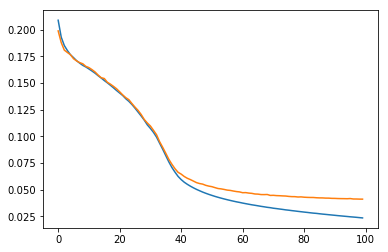

In [24]:
plt.plot(hist_classifier_ReLUBN_Res.history['loss'])
plt.plot(hist_classifier_ReLUBN_Res.history['val_loss'])

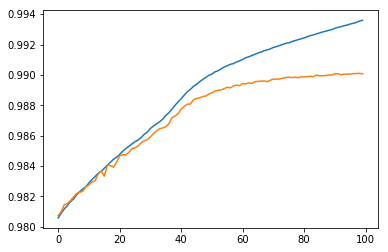

In [25]:
plt.plot(hist_classifier_ReLUBN_Res.history['acc'])
plt.plot(hist_classifier_ReLUBN_Res.history['val_acc'])

#### Without Resdual Block

In [11]:
cl_in      = Input(shape=x_train.shape[1:])
cl_conv_1  = Conv2D(64, 3, strides=2, activation='selu', padding='same', kernel_initializer='lecun_normal')(cl_in)
cl_pl_1    = MaxPooling2D()(cl_conv_1)
cl_res_1_1 = BatchNormalization()(cl_pl_1)
cl_res_1_1 = Activation('relu')(cl_res_1_1)
cl_res_1_1 = Conv2D(64, 3, strides=1, padding='same', kernel_initializer='lecun_normal')(cl_res_1_1)
cl_res_1_2 = BatchNormalization()(cl_res_1_1)
cl_res_1_2 = Activation('relu')(cl_res_1_2)
cl_res_1_2 = Conv2D(64, 3, strides=1, padding='same', kernel_initializer='lecun_normal')(cl_res_1_2)
cl_res_2_1 = BatchNormalization()(cl_res_1_2)
cl_res_2_1 = Activation('relu')(cl_res_2_1)
cl_res_2_1 = Conv2D(64, 3, strides=1, padding='same', kernel_initializer='lecun_normal')(cl_res_2_1)
cl_res_2_2 = BatchNormalization()(cl_res_2_1)
cl_res_2_2 = Activation('relu')(cl_res_2_2)
cl_res_2_2 = Conv2D(64, 3, strides=1, padding='same', kernel_initializer='lecun_normal')(cl_res_2_2)
cl_res_3_1 = BatchNormalization()(cl_res_2_2)
cl_res_3_1 = Activation('relu')(cl_res_3_1)
cl_res_3_1 = Conv2D(64, 3, strides=1, padding='same', kernel_initializer='lecun_normal')(cl_res_3_1)
cl_res_3_2 = BatchNormalization()(cl_res_3_1)
cl_res_3_2 = Activation('relu')(cl_res_3_2)
cl_res_3_2 = Conv2D(64, 3, strides=1, padding='same', kernel_initializer='lecun_normal')(cl_res_3_2)
cl_conv_2  = Conv2D(128, 3, strides=2, padding='same', kernel_initializer='lecun_normal')(cl_res_3_2)
cl_conv_2  = Conv2D(128, 3, strides=1, padding='same', kernel_initializer='lecun_normal')(cl_conv_2)
cl_res_4_1 = BatchNormalization()(cl_conv_2)
cl_res_4_1 = Activation('relu')(cl_res_4_1)
cl_res_4_1 = Conv2D(128, 3, strides=1, padding='same', kernel_initializer='lecun_normal')(cl_res_4_1)
cl_res_4_2 = BatchNormalization()(cl_res_4_1)
cl_res_4_2 = Activation('relu')(cl_res_4_2)
cl_res_4_2 = Conv2D(128, 3, strides=1, padding='same', kernel_initializer='lecun_normal')(cl_res_4_2)
cl_res_5_1 = BatchNormalization()(cl_res_4_2)
cl_res_5_1 = Activation('relu')(cl_res_5_1)
cl_res_5_1 = Conv2D(128, 3, strides=1, padding='same', kernel_initializer='lecun_normal')(cl_res_5_1)
cl_res_5_2 = BatchNormalization()(cl_res_5_1)
cl_res_5_2 = Activation('relu')(cl_res_5_2)
cl_res_5_2 = Conv2D(128, 3, strides=1, padding='same', kernel_initializer='lecun_normal')(cl_res_5_2)
cl_res_6_1 = BatchNormalization()(cl_res_5_2)
cl_res_6_1 = Activation('relu')(cl_res_6_1)
cl_res_6_1 = Conv2D(128, 3, strides=1, padding='same', kernel_initializer='lecun_normal')(cl_res_6_1)
cl_res_6_2 = BatchNormalization()(cl_res_6_1)
cl_res_6_2 = Activation('relu')(cl_res_6_2)
cl_res_6_2 = Conv2D(128, 3, strides=1, padding='same', kernel_initializer='lecun_normal')(cl_res_6_2)
cl_pl_2    = AveragePooling2D()(cl_res_6_2)
cl_flatten = Flatten()(cl_pl_2)
cl_fc100   = Dense(100, activation='softmax')(cl_flatten)
classifier_ReLUBN_noRes = Model(cl_in, cl_fc100)
plot_model(classifier_ReLUBN_noRes, 'classifier_ReLUBN_noRes.png', show_layer_names=False)
classifier_ReLUBN_noRes.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 16, 16, 64)        1792      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
batch_normalization_15 (Batc (None, 8, 8, 64)          256       
_________________________________________________________________
activation_15 (Activation)   (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 8, 8, 64)          36928     
_________________________________________________________________
batch_normalization_16 (Batc (None, 8, 8, 64)          256       
__________

In [12]:
OPT = Adam(0.00001)
classifier_ReLUBN_noRes.compile(loss='binary_crossentropy', optimizer=OPT, metrics=['binary_crossentropy', 'mse','acc'])
hist_classifier_ReLUBN_noRes = classifier_ReLUBN_noRes.fit(
    x_train,y_train, batch_size=64, epochs=100, validation_data=(x_test, y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 11s - loss: 0.0550 - binary_crossentropy: 0.0550 - mean_squared_error: 0.0099 - acc: 0.9900 - val_loss: 0.0536 - val_binary_crossentropy: 0.0536 - val_mean_squared_error: 0.0098 - val_acc: 0.9900
Epoch 2/100
50000/50000 [==============================] - 10s - loss: 0.0526 - binary_crossentropy: 0.0526 - mean_squared_error: 0.0098 - acc: 0.9900 - val_loss: 0.0514 - val_binary_crossentropy: 0.0514 - val_mean_squared_error: 0.0097 - val_acc: 0.9900
Epoch 3/100
50000/50000 [==============================] - 10s - loss: 0.0502 - binary_crossentropy: 0.0502 - mean_squared_error: 0.0096 - acc: 0.9900 - val_loss: 0.0491 - val_binary_crossentropy: 0.0491 - val_mean_squared_error: 0.0096 - val_acc: 0.9900
Epoch 4/100
50000/50000 [==============================] - 10s - loss: 0.0482 - binary_crossentropy: 0.0482 - mean_squared_error: 0.0095 - acc: 0.9900 - val_loss: 0.0476 - val_binary_cr

50000/50000 [==============================] - 10s - loss: 0.0266 - binary_crossentropy: 0.0266 - mean_squared_error: 0.0063 - acc: 0.9925 - val_loss: 0.0425 - val_binary_crossentropy: 0.0425 - val_mean_squared_error: 0.0089 - val_acc: 0.9902
Epoch 33/100
50000/50000 [==============================] - 10s - loss: 0.0260 - binary_crossentropy: 0.0260 - mean_squared_error: 0.0062 - acc: 0.9926 - val_loss: 0.0428 - val_binary_crossentropy: 0.0428 - val_mean_squared_error: 0.0089 - val_acc: 0.9902
Epoch 34/100
50000/50000 [==============================] - 10s - loss: 0.0254 - binary_crossentropy: 0.0254 - mean_squared_error: 0.0061 - acc: 0.9927 - val_loss: 0.0431 - val_binary_crossentropy: 0.0431 - val_mean_squared_error: 0.0090 - val_acc: 0.9901
Epoch 35/100
50000/50000 [==============================] - 10s - loss: 0.0248 - binary_crossentropy: 0.0248 - mean_squared_error: 0.0059 - acc: 0.9928 - val_loss: 0.0434 - val_binary_crossentropy: 0.0434 - val_mean_squared_error: 0.0090 - val_a

50000/50000 [==============================] - 10s - loss: 0.0101 - binary_crossentropy: 0.0101 - mean_squared_error: 0.0025 - acc: 0.9969 - val_loss: 0.0582 - val_binary_crossentropy: 0.0582 - val_mean_squared_error: 0.0105 - val_acc: 0.9882
Epoch 65/100
50000/50000 [==============================] - 10s - loss: 0.0100 - binary_crossentropy: 0.0100 - mean_squared_error: 0.0025 - acc: 0.9970 - val_loss: 0.0592 - val_binary_crossentropy: 0.0592 - val_mean_squared_error: 0.0105 - val_acc: 0.9880
Epoch 66/100
50000/50000 [==============================] - 10s - loss: 0.0094 - binary_crossentropy: 0.0094 - mean_squared_error: 0.0023 - acc: 0.9971 - val_loss: 0.0593 - val_binary_crossentropy: 0.0593 - val_mean_squared_error: 0.0105 - val_acc: 0.9881
Epoch 67/100
50000/50000 [==============================] - 10s - loss: 0.0090 - binary_crossentropy: 0.0090 - mean_squared_error: 0.0022 - acc: 0.9972 - val_loss: 0.0603 - val_binary_crossentropy: 0.0603 - val_mean_squared_error: 0.0106 - val_a

50000/50000 [==============================] - 10s - loss: 0.0035 - binary_crossentropy: 0.0035 - mean_squared_error: 8.2493e-04 - acc: 0.9990 - val_loss: 0.0740 - val_binary_crossentropy: 0.0740 - val_mean_squared_error: 0.0116 - val_acc: 0.9866
Epoch 96/100
50000/50000 [==============================] - 10s - loss: 0.0034 - binary_crossentropy: 0.0034 - mean_squared_error: 8.1724e-04 - acc: 0.9990 - val_loss: 0.0744 - val_binary_crossentropy: 0.0744 - val_mean_squared_error: 0.0117 - val_acc: 0.9865
Epoch 97/100
50000/50000 [==============================] - 10s - loss: 0.0034 - binary_crossentropy: 0.0034 - mean_squared_error: 8.0367e-04 - acc: 0.9990 - val_loss: 0.0750 - val_binary_crossentropy: 0.0750 - val_mean_squared_error: 0.0117 - val_acc: 0.9865
Epoch 98/100
50000/50000 [==============================] - 10s - loss: 0.0033 - binary_crossentropy: 0.0033 - mean_squared_error: 8.0052e-04 - acc: 0.9990 - val_loss: 0.0757 - val_binary_crossentropy: 0.0757 - val_mean_squared_error

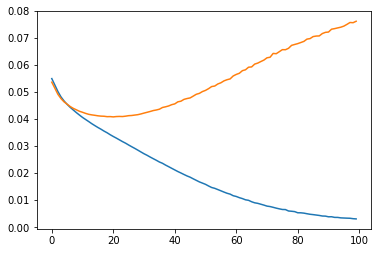

In [26]:
plt.plot(hist_classifier_ReLUBN_noRes.history['loss'])
plt.plot(hist_classifier_ReLUBN_noRes.history['val_loss'])

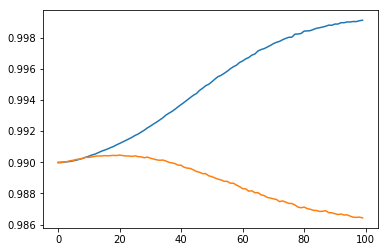

In [27]:
plt.plot(hist_classifier_ReLUBN_noRes.history['acc'])
plt.plot(hist_classifier_ReLUBN_noRes.history['val_acc'])

### SeLU version ResNet(No Batch Normalization)

##### With Resdual Block

In [13]:
cl_in      = Input(shape=x_train.shape[1:])
cl_conv_1  = Conv2D(64, 3, strides=2, activation='selu', padding='same', kernel_initializer='lecun_normal')(cl_in)
cl_pl_1    = MaxPooling2D()(cl_conv_1)
cl_res_1_1 = Conv2D(64, 3, strides=1, activation='selu', padding='same', kernel_initializer='lecun_normal')(cl_pl_1)
cl_res_1_2 = Conv2D(64, 3, strides=1, activation='selu', padding='same', kernel_initializer='lecun_normal')(cl_res_1_1)
cl_res_1_a = Add()([cl_pl_1, cl_res_1_2])
cl_res_2_1 = Conv2D(64, 3, strides=1, activation='selu', padding='same', kernel_initializer='lecun_normal')(cl_res_1_a)
cl_res_2_2 = Conv2D(64, 3, strides=1, activation='selu', padding='same', kernel_initializer='lecun_normal')(cl_res_2_1)
cl_res_2_a = Add()([cl_res_1_a, cl_res_2_2])
cl_res_3_1 = Conv2D(64, 3, strides=1, activation='selu', padding='same', kernel_initializer='lecun_normal')(cl_res_2_a)
cl_res_3_2 = Conv2D(64, 3, strides=1, activation='selu', padding='same', kernel_initializer='lecun_normal')(cl_res_3_1)
cl_res_3_a = Add()([cl_res_2_a, cl_res_3_2])
cl_conv_2  = Conv2D(128, 3, strides=2, activation='selu', padding='same', kernel_initializer='lecun_normal')(cl_res_3_a)
cl_conv_2  = Conv2D(128, 3, strides=1, activation='selu', padding='same', kernel_initializer='lecun_normal')(cl_conv_2)
cl_res_4_1 = Conv2D(128, 3, strides=1, activation='selu', padding='same', kernel_initializer='lecun_normal')(cl_conv_2)
cl_res_4_2 = Conv2D(128, 3, strides=1, activation='selu', padding='same', kernel_initializer='lecun_normal')(cl_res_4_1)
cl_res_4_a = Add()([cl_conv_2, cl_res_4_2])
cl_res_5_1 = Conv2D(128, 3, strides=1, activation='selu', padding='same', kernel_initializer='lecun_normal')(cl_res_4_a)
cl_res_5_2 = Conv2D(128, 3, strides=1, activation='selu', padding='same', kernel_initializer='lecun_normal')(cl_res_5_1)
cl_res_5_a = Add()([cl_res_4_a, cl_res_5_2])
cl_res_6_1 = Conv2D(128, 3, strides=1, activation='selu', padding='same', kernel_initializer='lecun_normal')(cl_res_5_a)
cl_res_6_2 = Conv2D(128, 3, strides=1, activation='selu', padding='same', kernel_initializer='lecun_normal')(cl_res_6_1)
cl_res_6_a = Add()([cl_res_5_a, cl_res_6_2])
cl_pl_2    = AveragePooling2D()(cl_res_6_a)
cl_flatten = Flatten()(cl_pl_2)
cl_fc100   = Dense(100, activation='softmax')(cl_flatten)
classifier = Model(cl_in, cl_fc100)
plot_model(classifier, 'resnet.png', show_layer_names=False)
classifier.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_4 (InputLayer)             (None, 32, 32, 3)     0                                            
____________________________________________________________________________________________________
conv2d_33 (Conv2D)               (None, 16, 16, 64)    1792        input_4[0][0]                    
____________________________________________________________________________________________________
max_pooling2d_3 (MaxPooling2D)   (None, 8, 8, 64)      0           conv2d_33[0][0]                  
____________________________________________________________________________________________________
conv2d_34 (Conv2D)               (None, 8, 8, 64)      36928       max_pooling2d_3[0][0]            
___________________________________________________________________________________________

In [14]:
OPT = Adam(0.00001)
classifier.compile(loss='binary_crossentropy', optimizer=OPT, metrics=['binary_crossentropy', 'mse','acc'])
hist_ResNet_SELU = classifier.fit(x_train,y_train, batch_size=64, epochs=100, validation_data=(x_test, y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 8s - loss: 0.2077 - binary_crossentropy: 0.2077 - mean_squared_error: 0.0184 - acc: 0.9802 - val_loss: 0.1946 - val_binary_crossentropy: 0.1946 - val_mean_squared_error: 0.0180 - val_acc: 0.9802
Epoch 2/100
50000/50000 [==============================] - 8s - loss: 0.1888 - binary_crossentropy: 0.1888 - mean_squared_error: 0.0176 - acc: 0.9802 - val_loss: 0.1848 - val_binary_crossentropy: 0.1848 - val_mean_squared_error: 0.0173 - val_acc: 0.9802
Epoch 3/100
50000/50000 [==============================] - 8s - loss: 0.1842 - binary_crossentropy: 0.1842 - mean_squared_error: 0.0173 - acc: 0.9802 - val_loss: 0.1823 - val_binary_crossentropy: 0.1823 - val_mean_squared_error: 0.0171 - val_acc: 0.9802
Epoch 4/100
50000/50000 [==============================] - 8s - loss: 0.1816 - binary_crossentropy: 0.1816 - mean_squared_error: 0.0170 - acc: 0.9802 - val_loss: 0.1802 - val_binary_crosse

50000/50000 [==============================] - 7s - loss: 0.0389 - binary_crossentropy: 0.0389 - mean_squared_error: 0.0084 - acc: 0.9906 - val_loss: 0.0420 - val_binary_crossentropy: 0.0420 - val_mean_squared_error: 0.0088 - val_acc: 0.9904
Epoch 33/100
50000/50000 [==============================] - 8s - loss: 0.0383 - binary_crossentropy: 0.0383 - mean_squared_error: 0.0083 - acc: 0.9907 - val_loss: 0.0417 - val_binary_crossentropy: 0.0417 - val_mean_squared_error: 0.0088 - val_acc: 0.9904
Epoch 34/100
50000/50000 [==============================] - 8s - loss: 0.0377 - binary_crossentropy: 0.0377 - mean_squared_error: 0.0082 - acc: 0.9908 - val_loss: 0.0415 - val_binary_crossentropy: 0.0415 - val_mean_squared_error: 0.0087 - val_acc: 0.9904
Epoch 35/100
50000/50000 [==============================] - 8s - loss: 0.0371 - binary_crossentropy: 0.0371 - mean_squared_error: 0.0082 - acc: 0.9908 - val_loss: 0.0411 - val_binary_crossentropy: 0.0411 - val_mean_squared_error: 0.0087 - val_acc: 

50000/50000 [==============================] - 7s - loss: 0.0259 - binary_crossentropy: 0.0259 - mean_squared_error: 0.0060 - acc: 0.9929 - val_loss: 0.0390 - val_binary_crossentropy: 0.0390 - val_mean_squared_error: 0.0084 - val_acc: 0.9904
Epoch 65/100
50000/50000 [==============================] - 8s - loss: 0.0255 - binary_crossentropy: 0.0255 - mean_squared_error: 0.0060 - acc: 0.9930 - val_loss: 0.0390 - val_binary_crossentropy: 0.0390 - val_mean_squared_error: 0.0084 - val_acc: 0.9904
Epoch 66/100
50000/50000 [==============================] - 8s - loss: 0.0252 - binary_crossentropy: 0.0252 - mean_squared_error: 0.0059 - acc: 0.9931 - val_loss: 0.0387 - val_binary_crossentropy: 0.0387 - val_mean_squared_error: 0.0084 - val_acc: 0.9905
Epoch 67/100
50000/50000 [==============================] - 8s - loss: 0.0249 - binary_crossentropy: 0.0249 - mean_squared_error: 0.0058 - acc: 0.9932 - val_loss: 0.0388 - val_binary_crossentropy: 0.0388 - val_mean_squared_error: 0.0084 - val_acc: 

50000/50000 [==============================] - 7s - loss: 0.0166 - binary_crossentropy: 0.0166 - mean_squared_error: 0.0039 - acc: 0.9954 - val_loss: 0.0416 - val_binary_crossentropy: 0.0416 - val_mean_squared_error: 0.0087 - val_acc: 0.9900
Epoch 97/100
50000/50000 [==============================] - 8s - loss: 0.0163 - binary_crossentropy: 0.0163 - mean_squared_error: 0.0038 - acc: 0.9955 - val_loss: 0.0417 - val_binary_crossentropy: 0.0417 - val_mean_squared_error: 0.0087 - val_acc: 0.9900
Epoch 98/100
50000/50000 [==============================] - 7s - loss: 0.0160 - binary_crossentropy: 0.0160 - mean_squared_error: 0.0038 - acc: 0.9956 - val_loss: 0.0420 - val_binary_crossentropy: 0.0420 - val_mean_squared_error: 0.0087 - val_acc: 0.9899
Epoch 99/100
50000/50000 [==============================] - 7s - loss: 0.0158 - binary_crossentropy: 0.0158 - mean_squared_error: 0.0037 - acc: 0.9956 - val_loss: 0.0422 - val_binary_crossentropy: 0.0422 - val_mean_squared_error: 0.0087 - val_acc: 

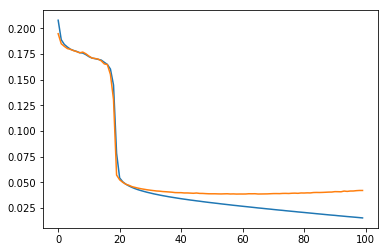

In [28]:
plt.plot(hist_ResNet_SELU.history['loss'])
plt.plot(hist_ResNet_SELU.history['val_loss'])

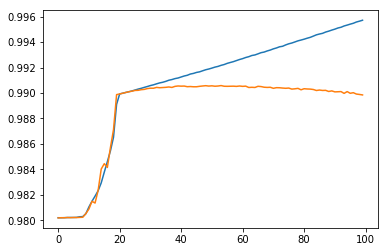

In [29]:
plt.plot(hist_ResNet_SELU.history['acc'])
plt.plot(hist_ResNet_SELU.history['val_acc'])

#### Without Resdual Block

In [15]:
cl_in      = Input(shape=x_train.shape[1:])
cl_conv_1  = Conv2D(64, 3, strides=2, activation='selu', padding='same', kernel_initializer='lecun_normal')(cl_in)
cl_pl_1    = MaxPooling2D()(cl_conv_1)
cl_res_1_1 = Conv2D(64, 3, strides=1, activation='selu', padding='same', kernel_initializer='lecun_normal')(cl_pl_1)
cl_res_1_2 = Conv2D(64, 3, strides=1, activation='selu', padding='same', kernel_initializer='lecun_normal')(cl_res_1_1)
cl_res_2_1 = Conv2D(64, 3, strides=1, activation='selu', padding='same', kernel_initializer='lecun_normal')(cl_res_1_2)
cl_res_2_2 = Conv2D(64, 3, strides=1, activation='selu', padding='same', kernel_initializer='lecun_normal')(cl_res_2_1)
cl_res_3_1 = Conv2D(64, 3, strides=1, activation='selu', padding='same', kernel_initializer='lecun_normal')(cl_res_2_2)
cl_res_3_2 = Conv2D(64, 3, strides=1, activation='selu', padding='same', kernel_initializer='lecun_normal')(cl_res_3_1)
cl_conv_2  = Conv2D(128, 3, strides=2, activation='selu', padding='same', kernel_initializer='lecun_normal')(cl_res_3_2)
cl_conv_2  = Conv2D(128, 3, strides=1, activation='selu', padding='same', kernel_initializer='lecun_normal')(cl_conv_2)
cl_res_4_1 = Conv2D(128, 3, strides=1, activation='selu', padding='same', kernel_initializer='lecun_normal')(cl_conv_2)
cl_res_4_2 = Conv2D(128, 3, strides=1, activation='selu', padding='same', kernel_initializer='lecun_normal')(cl_res_4_1)
cl_res_5_1 = Conv2D(128, 3, strides=1, activation='selu', padding='same', kernel_initializer='lecun_normal')(cl_res_4_2)
cl_res_5_2 = Conv2D(128, 3, strides=1, activation='selu', padding='same', kernel_initializer='lecun_normal')(cl_res_5_1)
cl_res_6_1 = Conv2D(128, 3, strides=1, activation='selu', padding='same', kernel_initializer='lecun_normal')(cl_res_5_2)
cl_res_6_2 = Conv2D(128, 3, strides=1, activation='selu', padding='same', kernel_initializer='lecun_normal')(cl_res_6_1)
cl_pl_2    = AveragePooling2D()(cl_res_6_2)
cl_flatten = Flatten()(cl_pl_2)
cl_fc100   = Dense(100, activation='softmax')(cl_flatten)
classifier_noRes = Model(cl_in, cl_fc100)
plot_model(classifier_noRes, 'classifier_noRes.png', show_layer_names=False)
classifier_noRes.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_48 (Conv2D)           (None, 16, 16, 64)        1792      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_49 (Conv2D)           (None, 8, 8, 64)          36928     
_________________________________________________________________
conv2d_50 (Conv2D)           (None, 8, 8, 64)          36928     
_________________________________________________________________
conv2d_51 (Conv2D)           (None, 8, 8, 64)          36928     
_________________________________________________________________
conv2d_52 (Conv2D)           (None, 8, 8, 64)          36928     
__________

In [16]:
OPT = Adam(0.00001)
classifier_noRes.compile(loss='binary_crossentropy', optimizer=OPT, metrics=['binary_crossentropy', 'mse','acc'])
hist_NoResNet_SELU = classifier_noRes.fit(x_train,y_train, batch_size=64, epochs=100, validation_data=(x_test, y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 8s - loss: 0.0528 - binary_crossentropy: 0.0528 - mean_squared_error: 0.0098 - acc: 0.9900 - val_loss: 0.0495 - val_binary_crossentropy: 0.0495 - val_mean_squared_error: 0.0097 - val_acc: 0.9900
Epoch 2/100
50000/50000 [==============================] - 8s - loss: 0.0478 - binary_crossentropy: 0.0478 - mean_squared_error: 0.0095 - acc: 0.9900 - val_loss: 0.0468 - val_binary_crossentropy: 0.0468 - val_mean_squared_error: 0.0095 - val_acc: 0.9900
Epoch 3/100
50000/50000 [==============================] - 7s - loss: 0.0453 - binary_crossentropy: 0.0453 - mean_squared_error: 0.0093 - acc: 0.9900 - val_loss: 0.0447 - val_binary_crossentropy: 0.0447 - val_mean_squared_error: 0.0092 - val_acc: 0.9901
Epoch 4/100
50000/50000 [==============================] - 8s - loss: 0.0435 - binary_crossentropy: 0.0435 - mean_squared_error: 0.0091 - acc: 0.9901 - val_loss: 0.0437 - val_binary_crosse

50000/50000 [==============================] - 7s - loss: 0.0300 - binary_crossentropy: 0.0300 - mean_squared_error: 0.0070 - acc: 0.9917 - val_loss: 0.0362 - val_binary_crossentropy: 0.0362 - val_mean_squared_error: 0.0080 - val_acc: 0.9909
Epoch 33/100
50000/50000 [==============================] - 7s - loss: 0.0296 - binary_crossentropy: 0.0296 - mean_squared_error: 0.0070 - acc: 0.9918 - val_loss: 0.0364 - val_binary_crossentropy: 0.0364 - val_mean_squared_error: 0.0080 - val_acc: 0.9909
Epoch 34/100
50000/50000 [==============================] - 8s - loss: 0.0294 - binary_crossentropy: 0.0294 - mean_squared_error: 0.0069 - acc: 0.9919 - val_loss: 0.0362 - val_binary_crossentropy: 0.0362 - val_mean_squared_error: 0.0080 - val_acc: 0.9909
Epoch 35/100
50000/50000 [==============================] - 7s - loss: 0.0291 - binary_crossentropy: 0.0291 - mean_squared_error: 0.0069 - acc: 0.9919 - val_loss: 0.0362 - val_binary_crossentropy: 0.0362 - val_mean_squared_error: 0.0080 - val_acc: 

50000/50000 [==============================] - 8s - loss: 0.0207 - binary_crossentropy: 0.0207 - mean_squared_error: 0.0050 - acc: 0.9940 - val_loss: 0.0386 - val_binary_crossentropy: 0.0386 - val_mean_squared_error: 0.0083 - val_acc: 0.9905
Epoch 65/100
50000/50000 [==============================] - 7s - loss: 0.0204 - binary_crossentropy: 0.0204 - mean_squared_error: 0.0049 - acc: 0.9941 - val_loss: 0.0384 - val_binary_crossentropy: 0.0384 - val_mean_squared_error: 0.0082 - val_acc: 0.9905
Epoch 66/100
50000/50000 [==============================] - 8s - loss: 0.0201 - binary_crossentropy: 0.0201 - mean_squared_error: 0.0049 - acc: 0.9942 - val_loss: 0.0385 - val_binary_crossentropy: 0.0385 - val_mean_squared_error: 0.0083 - val_acc: 0.9905
Epoch 67/100
50000/50000 [==============================] - 7s - loss: 0.0199 - binary_crossentropy: 0.0199 - mean_squared_error: 0.0048 - acc: 0.9942 - val_loss: 0.0387 - val_binary_crossentropy: 0.0387 - val_mean_squared_error: 0.0083 - val_acc: 

50000/50000 [==============================] - 8s - loss: 0.0119 - binary_crossentropy: 0.0119 - mean_squared_error: 0.0029 - acc: 0.9966 - val_loss: 0.0476 - val_binary_crossentropy: 0.0476 - val_mean_squared_error: 0.0092 - val_acc: 0.9892
Epoch 97/100
50000/50000 [==============================] - 8s - loss: 0.0116 - binary_crossentropy: 0.0116 - mean_squared_error: 0.0028 - acc: 0.9967 - val_loss: 0.0475 - val_binary_crossentropy: 0.0475 - val_mean_squared_error: 0.0092 - val_acc: 0.9893
Epoch 98/100
50000/50000 [==============================] - 8s - loss: 0.0114 - binary_crossentropy: 0.0114 - mean_squared_error: 0.0027 - acc: 0.9968 - val_loss: 0.0485 - val_binary_crossentropy: 0.0485 - val_mean_squared_error: 0.0093 - val_acc: 0.9891
Epoch 99/100
50000/50000 [==============================] - 8s - loss: 0.0111 - binary_crossentropy: 0.0111 - mean_squared_error: 0.0027 - acc: 0.9969 - val_loss: 0.0486 - val_binary_crossentropy: 0.0486 - val_mean_squared_error: 0.0093 - val_acc: 

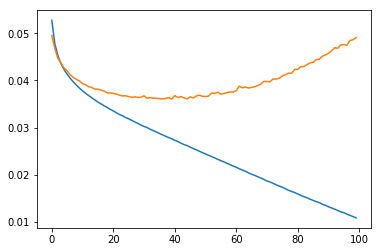

In [30]:
plt.plot(hist_NoResNet_SELU.history['loss'])
plt.plot(hist_NoResNet_SELU.history['val_loss'])

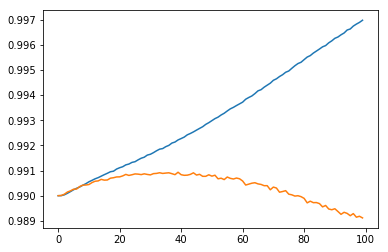

In [31]:
plt.plot(hist_NoResNet_SELU.history['acc'])
plt.plot(hist_NoResNet_SELU.history['val_acc'])

## DenseNet

In [32]:
dense_block_input = Input((9,4,87))
dense_block_1     = Conv2D(87, 3 , strides=1,name='dense_block_1' , activation='selu', padding='same', kernel_initializer='lecun_normal')(dense_block_input)
dense_block_2     = Conv2D(87, 3 , strides=1,name='dense_block_2' , padding='same', activation='selu', kernel_initializer='lecun_normal')(dense_block_1)
dense_block_add1  = Add()([dense_block_input, dense_block_2])
dense_block_3     = Conv2D(87, 3 , strides=1,name='dense_block_3' , padding='same', activation='selu', kernel_initializer='lecun_normal')(dense_block_add1)
dense_block_add2  = Add()([dense_block_input, dense_block_1, dense_block_3])
dense_block_4     = Conv2D(87, 3 , strides=1,name='dense_block_4' , padding='same', activation='selu', kernel_initializer='lecun_normal')(dense_block_add2)
dense_block_add3  = Add()([dense_block_input, dense_block_1, dense_block_2, dense_block_4])
dense_block_5     = Conv2D(87, 3 , strides=1,name='dense_block_5' , padding='same', activation='selu', kernel_initializer='lecun_normal')(dense_block_add3)
dense_block_add4  = Add()([dense_block_input, dense_block_1, dense_block_2, dense_block_3, dense_block_5])
dense_block_6     = Conv2D(87, 3 , strides=1,name='dense_block_6' , padding='same', activation='selu', kernel_initializer='lecun_normal')(dense_block_add4)
dense_block_add5  = Add()([dense_block_input, dense_block_1, dense_block_2, dense_block_3, dense_block_4, dense_block_6])
res_block = Model(dense_block_input, dense_block_add5, name='dense_block')
plot_model(res_block, 'Dense_block.png')
res_block.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_6 (InputLayer)             (None, 9, 4, 87)      0                                            
____________________________________________________________________________________________________
dense_block_1 (Conv2D)           (None, 9, 4, 87)      68208       input_6[0][0]                    
____________________________________________________________________________________________________
dense_block_2 (Conv2D)           (None, 9, 4, 87)      68208       dense_block_1[0][0]              
____________________________________________________________________________________________________
add_14 (Add)                     (None, 9, 4, 87)      0           input_6[0][0]                    
                                                                   dense_block_2[0][0]     